In [11]:
import cv2
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('TkAgg')
import numpy as np


## 取中心点函数

In [12]:
def center(location):
    lenth = location.shape[0]
    sumloc = 0
    for i in range(lenth):
        sumloc = sumloc + location[i, 0, 0]
    avrlenth = sumloc/lenth

    sumlocw = 0
    for i in range(lenth):
        sumlocw = sumlocw + location[i, 0, 1]
    avrwidth = sumlocw / lenth

    return avrlenth, avrwidth

## 数据可视化

In [13]:
img1 = cv2.imread('1.jpg', 0) #待测字样
img = cv2.imread('2.jpg', 0) #字模
print(img.shape, img1.shape)

(849, 909) (240, 243)


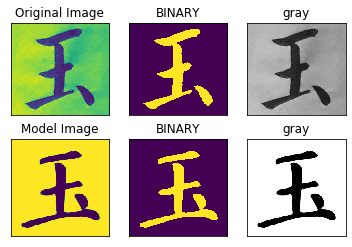

In [14]:
_, thresh = cv2.threshold(img, 1, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
_, thresh1 = cv2.threshold(img1, 1, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(thresh, 3, 2)
contours1, hierarchy1 = cv2.findContours(thresh1, 3, 2)
image = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
image2 = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)
centerdot = np.zeros(shape=(len(contours),1,2),dtype=np.int)
centerdot1 = np.zeros(shape=(len(contours1),1,2),dtype=np.int)
titles = ['Original Image','BINARY','gray','Model Image','BINARY','gray']
images = [img, thresh, image, img1, thresh1, image2]
# images = [img, binary, img,  binary, img, binary]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## 寻找凸包

698
386
122
124
(849, 909, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


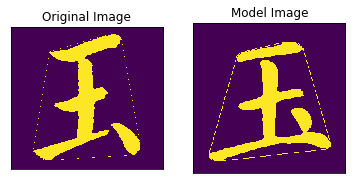

In [15]:

for i in range(len(contours)):
    # 1.先找到轮廓
    cnt = contours[i]
    # 2.寻找凸包，得到凸包的角点
    hull = cv2.convexHull(cnt)
    # 3.绘制凸包
    #print(hull)
    cv2.polylines(image, [hull], True, (0, 0, 0), 2)
    centerdot[i,0,0] = int(center(hull)[0])
    centerdot[i,0,1] = int(center(hull)[1])
    print(centerdot[i,0,0])
    
for i in range(len(contours1)):
    # 1.先找到轮廓
    cnt = contours1[i]
    # 2.寻找凸包，得到凸包的角点
    hull = cv2.convexHull(cnt)
    # 3.绘制凸包
    #print(hull)
    cv2.polylines(image2, [hull], True, (0, 0, 0), 2)
    centerdot1[i,0,0] = int(center(hull)[0])
    centerdot1[i,0,1] = int(center(hull)[1])
    print(centerdot1[i,0,0])

#print(centerdot)
cv2.polylines(image, [centerdot], True, (0, 0, 0), 2)
cv2.polylines(image2, [centerdot1], True, (0, 0, 0), 2)


print(image.shape)
image1 = image[:,:,0]
image3 = image2[:,:,0]


#画外部轮廓


_, thresh2 = cv2.threshold(image1, 1, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
contours1, hierarchy1 = cv2.findContours(thresh2, 3, 2)

_, thresh3 = cv2.threshold(image3, 1, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
contours2, hierarchy2 = cv2.findContours(thresh3, 3, 2)
#image1 = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

   # 1.先找到轮廓
cnt = contours1[0]
cnt1 = contours2[0]
    # 2.寻找凸包，得到凸包的角点
hull = cv2.convexHull(cnt)
hull1 = cv2.convexHull(cnt1)
    # 3.绘制凸包
    #print(hull)
cv2.polylines(thresh, [hull], True, (255, 255, 255), 1)
cv2.polylines(thresh1, [hull1], True, (255, 255, 255), 1)

titles = ['Original Image','Model Image']
images = [thresh, thresh1]
# images = [img, binary, img,  binary, img, binary]

for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

thresh_copy =np.zeros(thresh.shape,np.uint8)
print(type(thresh_copy))
thresh_copy = thresh.copy()
thresh1_copy = thresh1.copy()

#see copy
thresh_copy1 = thresh.copy()
thresh1_copy1 = thresh1.copy()

cv2.fillPoly(thresh_copy,[hull],(255,255,255))  #填充内部
cv2.fillPoly(thresh1_copy,[hull1],(255,255,255))  #填充内部
print(type(thresh_copy))
print(type(thresh))
#
# plt.imshow(thresh)
# plt.imshow(thresh1)

## 提取外接矩形

x,y,w,h: 131 50 637 748
roi: (748, 637)
(240, 243)


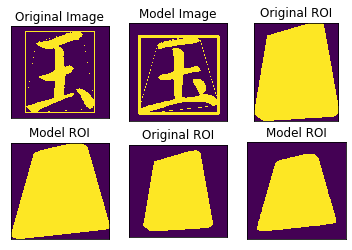

In [16]:
# contours, hierarchy = cv2.findContours(thresh1.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cnt = contours[0]  
# print((contours[0].shape) )
x,y,w,h = cv2.boundingRect(cnt)
rectangle = cv2.rectangle(thresh,(x,y),(x+w,y+h),(255,0,0),5)
roi = thresh_copy[y:y+h,x:x+w]
roi_copy = thresh_copy1[y:y+h,x:x+w]
print('x,y,w,h:',x,y,w,h)
print('roi:',roi.shape)
# cv2.imshow('roi',roi)
# cv2.waitKey(0)
x,y,w,h = cv2.boundingRect(cnt1)
rectangle1 = cv2.rectangle(thresh1,(x,y),(x+w,y+h),(255,0,0),5)
roi1 = thresh1_copy[y:y+h,x:x+w]
roi1_copy = thresh1_copy1[y:y+h,x:x+w]

print(rectangle1.shape)
titles = ['Original Image','Model Image', 'Original ROI','Model ROI','Original ROI','Model ROI']
images = [rectangle, rectangle1, roi, roi1,thresh_copy,thresh1_copy]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## 大小缩放及中点匹配

roi.shape (748, 637) model.shape (189, 194) roi.unique: [  0 255] model.unique: [  0 255]
370230.0 26166.0 3.7615525635837566
370230.0 369578.0
roi.shape (748, 637) model.shape (710, 729) roi.unique: [  0 255] model.unique: [  0 255]
(768, 749) (768, 749)
(768, 749) (768, 749)
[  0 255]


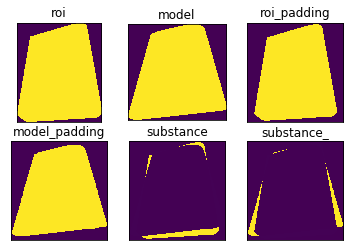

In [17]:
import math
print('roi.shape',roi.shape,'model.shape',roi1.shape, 'roi.unique:',np.unique(roi), 'model.unique:',np.unique(roi1))
scale_percent = 400       # percent of original size

#保持纵横比缩放scale_percent%
def img_resize(img, scale_percent):
    width = int(img.shape[1] * scale_percent)
    height = int(img.shape[0] * scale_percent)
    dim = (width, height)
    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    return resized


num_roi = roi.sum()/255
num_model = roi1.sum()/255
scale_percent = math.sqrt(num_roi/num_model)
print(num_roi, num_model, scale_percent)

resized_model = img_resize(roi1,scale_percent)  #插值后不再是二值图像 thresh1
ret, resized_model = cv2.threshold(resized_model, 110, 255, cv2.THRESH_BINARY)
resized_modelcopy = img_resize(roi1_copy,scale_percent)  #插值后不再是二值图像 thresh1
ret, resized_modelcopy = cv2.threshold(resized_modelcopy, 110, 255, cv2.THRESH_BINARY)

num_roi = roi.sum()/255
num_model = resized_model.sum()/255
print(num_roi, num_model)
print('roi.shape',roi.shape,'model.shape',resized_model.shape,'roi.unique:',np.unique(roi), 'model.unique:',np.unique(resized_model))

padding_size = [0,0]
padding_size[0] = max(roi.shape[0],resized_model.shape[0])+20
padding_size[1] = max(roi.shape[1],resized_model.shape[1])+20


roi_padding = np.lib.pad(roi, ((int((padding_size[0]-roi.shape[0])/2), int((padding_size[0]-roi.shape[0])-int((padding_size[0]-roi.shape[0])/2))),
                     (int((padding_size[1]-roi.shape[1])/2), int((padding_size[1]-roi.shape[1])-int((padding_size[1]-roi.shape[1])/2)))), 'constant', constant_values=np.array(((0, 0),(0, 0))))
model_padding = np.lib.pad(resized_model, ((int((padding_size[0]-resized_model.shape[0])/2), int((padding_size[0]-resized_model.shape[0])-int((padding_size[0]-resized_model.shape[0])/2))),
                     (int((padding_size[1]-resized_model.shape[1])/2), int((padding_size[1]-resized_model.shape[1])-int((padding_size[1]-resized_model.shape[1])/2)))), 'constant', constant_values=np.array(((0, 0),(0, 0))))
print(roi_padding.shape,model_padding.shape)

#copy
roi_paddingcopy = np.lib.pad(roi_copy, ((int((padding_size[0]-roi.shape[0])/2), int((padding_size[0]-roi.shape[0])-int((padding_size[0]-roi.shape[0])/2))),
                     (int((padding_size[1]-roi.shape[1])/2), int((padding_size[1]-roi.shape[1])-int((padding_size[1]-roi.shape[1])/2)))), 'constant', constant_values=np.array(((0, 0),(0, 0))))
model_paddingcopy = np.lib.pad(resized_modelcopy, ((int((padding_size[0]-resized_model.shape[0])/2), int((padding_size[0]-resized_model.shape[0])-int((padding_size[0]-resized_model.shape[0])/2))),
                     (int((padding_size[1]-resized_model.shape[1])/2), int((padding_size[1]-resized_model.shape[1])-int((padding_size[1]-resized_model.shape[1])/2)))), 'constant', constant_values=np.array(((0, 0),(0, 0))))
print(roi_padding.shape,model_padding.shape)

substance =  roi_padding - model_padding
substance_ =  model_padding - roi_padding
print(np.unique(roi_padding))

titles = ['roi','model','roi_padding','model_padding','substance','substance_']
images = [ roi, roi1, roi_padding, model_padding, substance, substance_]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## IOU计算

In [18]:
def get_iou(target,prediction):
    intersection = np.logical_and(target, prediction) 
    union = np.logical_or(target, prediction) 
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score
iou = get_iou(model_padding, roi_padding)
iou2 = get_iou(roi_padding, model_padding)
print(iou,iou2)

0.8669573819473886 0.8669573819473886


## 可视化

(768, 749)


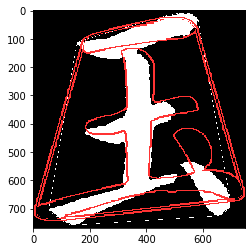

In [19]:
border =  cv2.adaptiveThreshold(model_paddingcopy, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV, 11, 1)
from skimage import color, img_as_float
from skimage.exposure import adjust_gamma

plus = roi_paddingcopy + border

model_line = np.argwhere (border == 255)
gray_img = img_as_float(roi_paddingcopy)
print(gray_img.shape)
image = adjust_gamma(color.gray2rgb(gray_img), 0.65) 
adjust = image.copy()
red_multiplier = [1, 0.2, 0.2]

for i in range(len(model_line)):
    adjust[model_line[i][0]][model_line[i][1]] = red_multiplier

titles = ['roi_pad','model_pad','border','plus','adjust','substance_']
images = [ roi_padding, model_padding, border,plus, adjust, substance_]
# for i in range(5):
#     plt.subplot(1,5,i+1),plt.imshow(images[i])
#     plt.title(titles[i])
#     plt.xticks([]),plt.yticks([])
# plt.show()
plt.imshow(images[4])
plt.show()